In [1]:
import os
path = "C:/pytest_img/"
os.chdir(path)

In [2]:
import sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
import tensorflow as tf

In [3]:
folder = 'C:/pytest_img/mnist_jpg/'
files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print(len(files))

60000


In [4]:
for i in range(0,2):
    print(files[i])
    display(_Imgdis(filename= folder+files[i], width = 30, height = 40))

img_0_ (1).jpg


img_0_ (10).jpg


In [5]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
file_names = []
file_labels = []

for _file in files:
    file_names.append(_file)
    label_start = _file.find("_") +1
    label_end = _file.find("_ (")
    file_labels.append(int(_file[label_start:label_end]))
print(len(file_names))

60000


In [6]:
os.chdir('C:/pytest_img/mnist_jpg')
# 한 개 파일 로드
img = load_img(file_names[0])
print("Orginal : ", type(img))
# PIL 파일을 넘파이 배열로 변환
img_array = img_to_array(img)
print(type(img_array), img_array.dtype,img_array.shape, sep = '\n')

Orginal :  <class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
float32
(28, 28, 3)


In [7]:
# 이미지의 shape 확인
image_height = img_array.shape[0]
image_width = img_array.shape[1]
channels = img_array.shape[2]

dataset = np.ndarray(shape=(len(file_names), image_height, image_width, channels), dtype = np.int32)

In [8]:
dataset.shape

(60000, 28, 28, 3)

In [9]:
# 모든 파일을 넘파이 배열로 변환
for count, item in enumerate(file_names):
    img = load_img(file_names[count])
    img_array = img_to_array(img)
    img_array = img_array.reshape((28,28,3))
    dataset[count] = img_array
    if count % 5000 == 0:
        print(count)
print('END')

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
END


In [10]:
print(file_labels[50000])

8


In [11]:
display(_Imgdis(filename= folder + files[50000], width = 30, height = 40))

In [12]:
np.set_printoptions(linewidth=np.inf)
print(dataset[50000,:,:,0])

[[  0   0   0   0   0   0   0   0   0   7   3   0   6   8   0   3   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  18   0   0   8   2   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   4   4   0   0   6  14   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  11   2  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   0   8   1   0  88 170  69   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  16   0   0  52 205 205   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  11   4 145 255 234 102   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3   6  37 240 255 113   0   6   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   7 212 255 137  11   7  12   0  10   0   

In [13]:
from sklearn.model_selection import train_test_split
train_imgs, test_imgs, train_labels, test_labels = train_test_split(dataset, file_labels, test_size = 0.2)

In [14]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (3,3), input_shape = (28,28,3), activation = 'relu'))
model.add(layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = 2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [16]:
model.compile(loss= 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])

In [17]:
train_imgs = train_imgs.reshape((len(train_imgs), 28, 28,3))
train_imgs = train_imgs.astype('float32')/255

test_imgs = test_imgs.reshape((len(test_imgs),28,28,3))
test_imgs = test_imgs.astype('float32')/255

In [18]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
with tf.device('/CPU:0'):
    history = model.fit(train_imgs, train_labels, epochs = 5, batch_size = 128, validation_data = (test_imgs, test_labels))

Epoch 1/5
375/375 [==============================] - 48s 127ms/step - loss: 0.1999 - acc: 0.9385 - val_loss: 0.0549 - val_acc: 0.9829
Epoch 2/5
375/375 [==============================] - 46s 122ms/step - loss: 0.0595 - acc: 0.9825 - val_loss: 0.0378 - val_acc: 0.9882
Epoch 3/5
375/375 [==============================] - 46s 123ms/step - loss: 0.0417 - acc: 0.9872 - val_loss: 0.0414 - val_acc: 0.9870
Epoch 4/5
375/375 [==============================] - 46s 123ms/step - loss: 0.0324 - acc: 0.9898 - val_loss: 0.0338 - val_acc: 0.9904
Epoch 5/5
375/375 [==============================] - 46s 124ms/step - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0387 - val_acc: 0.9893


In [21]:
with tf.device('/CPU:0'):
    model.evaluate(test_imgs, test_labels)

375/375 [==============================] - 3s 8ms/step - loss: 0.0387 - acc: 0.9893


In [22]:
import matplotlib.pyplot as plt

In [23]:
epochs = range(0,5)

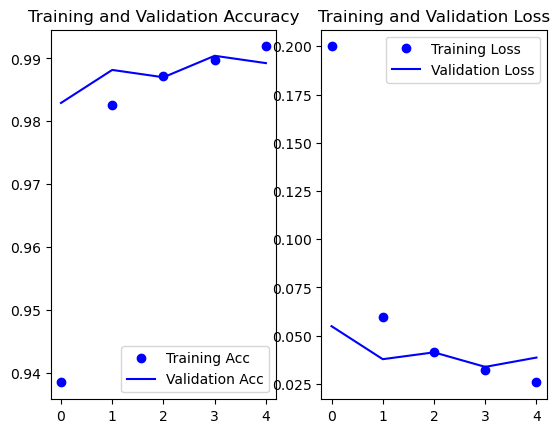

In [27]:
plt.subplot(121)
plt.plot(epochs, history.history['acc'], 'bo', label = 'Training Acc')
plt.plot(epochs, history.history['val_acc'],'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.subplot(122)
plt.plot(epochs, history.history['loss'], 'bo', label = 'Training Loss')
plt.plot(epochs, history.history['val_loss'],'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()